### Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### Dataset Analysis

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


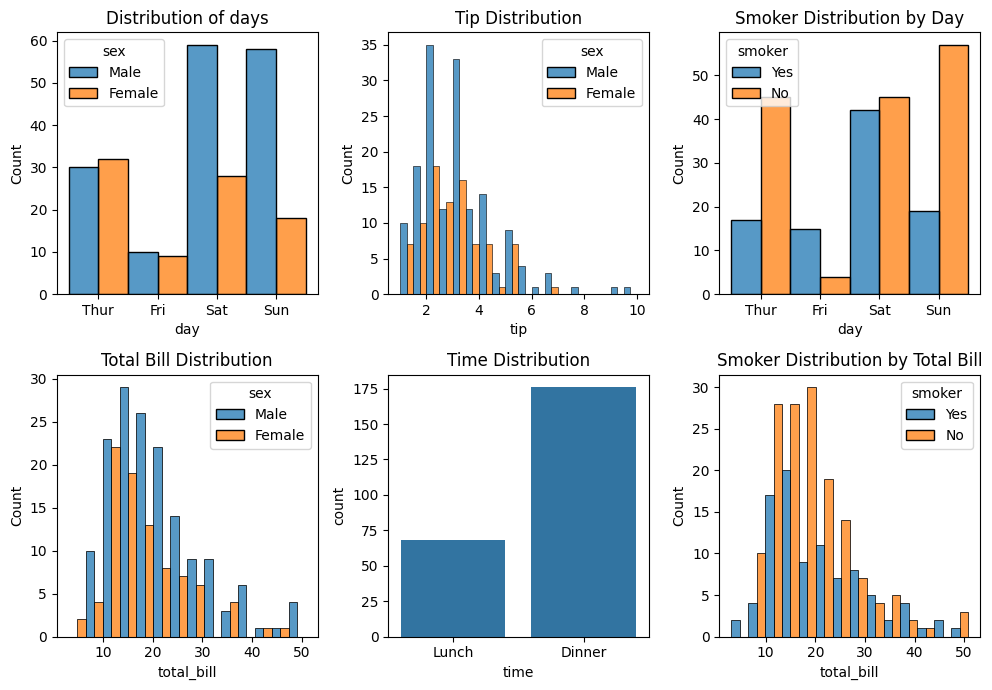

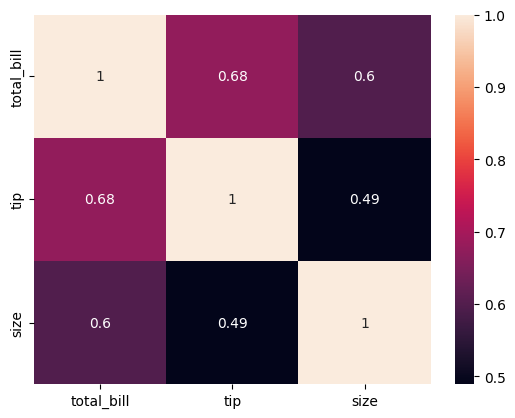

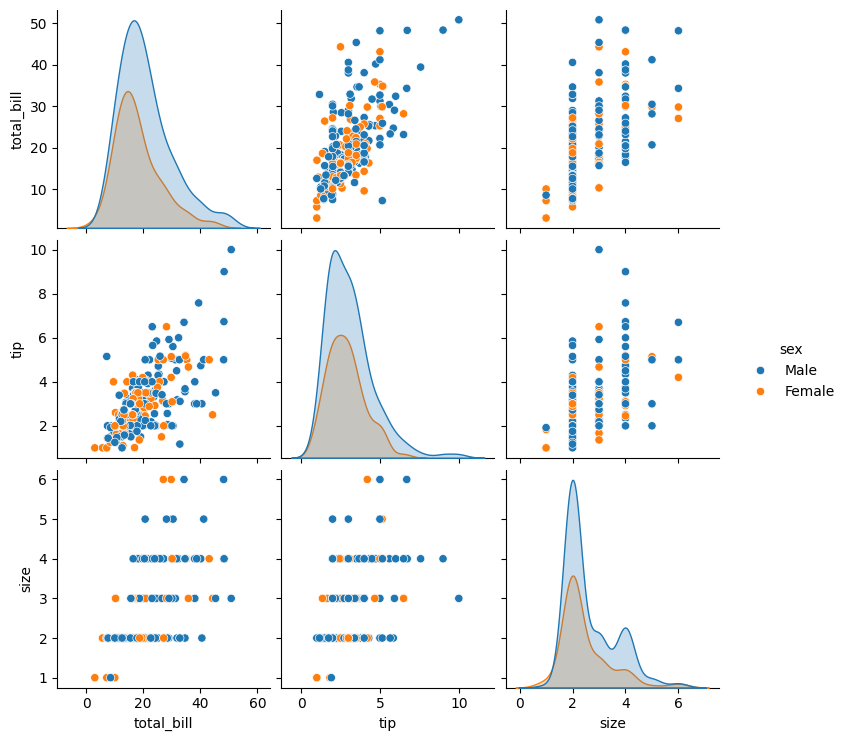

In [2]:
# Load the dataset
df = sns.load_dataset("tips")

# Display the first 5 rows of the dataset
print(df.head())
print()

# Basic statistics
print(df.describe())

# Plots

fig, axs = plt.subplots(2, 3, figsize=(10,7))

sns.histplot(data=df, x="day", hue="sex", multiple="dodge", ax=axs[0,0])
axs[0,0].set_title("Distribution of days")

sns.histplot(data=df, x="tip", hue="sex", multiple="dodge", ax=axs[0,1])
axs[0,1].set_title("Tip Distribution")

sns.histplot(data=df, x="total_bill", hue="sex", multiple="dodge", ax=axs[1,0])
axs[1,0].set_title("Total Bill Distribution")

sns.countplot(data=df, x="time", ax=axs[1,1])
axs[1,1].set_title("Time Distribution")

sns.histplot(data=df, x="day", hue="smoker", multiple="dodge", ax=axs[0,2])
axs[0,2].set_title("Smoker Distribution by Day")

sns.histplot(data=df, x="total_bill", hue="smoker", multiple="dodge", ax=axs[1,2])
axs[1,2].set_title("Smoker Distribution by Total Bill")

fig.tight_layout()
plt.show()

numerical_df = df.drop(["sex", "time", "smoker", "day"], axis=1)
cor = numerical_df.corr()
sns.heatmap(cor, annot=True)
sns.pairplot(df, hue="sex")
plt.show()

### Preprocessing

In [3]:
x = df["total_bill"].values.reshape(-1,1)
y = df["tip"].values.reshape(-1,1)

scalerx = StandardScaler()
scalery = StandardScaler()

scl_x = scalerx.fit_transform(x)
scl_y = scalery.fit_transform(y)

### Model Training

In [4]:
model = LinearRegression()
model.fit(scl_x, scl_y)

LinearRegression()

### Model Visualization

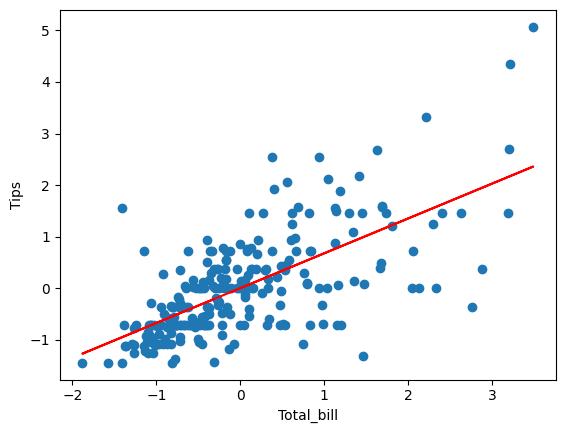

In [5]:
plt.scatter(x=scl_x, y=scl_y)
plt.plot(scl_x, model.predict(scl_x), c="red")
plt.ylabel("Tips")
plt.xlabel("Total_bill")
plt.show()